# Import Libraries

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

ERROR: Operation cancelled by user


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Hostel.csv')

# Data Cleaning







In [4]:
duplicates = df.duplicated()
print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, hostel.name, City, price.from, Distance, summary.score, rating.band, atmosphere, cleanliness, facilities, location.y, security, staff, valueformoney, lon, lat]
Index: []


There are no duplicated rows.

In [5]:
missing_values = df.isnull().sum()
print(f"Number of missing values in column_name: \n\n{missing_values}")

Number of missing values in column_name: 

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64


Various columns have missing columns. We will elect to remove latitude and longitude for now. Then, we will remove the rows with 15 missing values.

In [6]:
df_dropcolumns = df.drop(['Unnamed: 0','lon', 'lat'], axis=1)
drop_na_df = df_dropcolumns.dropna()

In [7]:
missing_values = drop_na_df.isnull().sum()
print(f"Number of missing values in column_name: \n\n{missing_values}")

Number of missing values in column_name: 

hostel.name      0
City             0
price.from       0
Distance         0
summary.score    0
rating.band      0
atmosphere       0
cleanliness      0
facilities       0
location.y       0
security         0
staff            0
valueformoney    0
dtype: int64


In [8]:
# Number of times that rating.band is equal to 'Rating', which is not a real rating
count = (drop_na_df['rating.band'] == 'Rating').sum()
print(f"The number of times 'rating.band' is equal to 'Rating' is: {count}")

The number of times 'rating.band' is equal to 'Rating' is: 8


In [9]:
# Drop rows where 'rating.band' is equal to 'Rating'
drop_na_df = drop_na_df[drop_na_df['rating.band'] != 'Rating']

# Exploratory Data Analysis

In [10]:
drop_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 341
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hostel.name    319 non-null    object 
 1   City           319 non-null    object 
 2   price.from     319 non-null    int64  
 3   Distance       319 non-null    object 
 4   summary.score  319 non-null    float64
 5   rating.band    319 non-null    object 
 6   atmosphere     319 non-null    float64
 7   cleanliness    319 non-null    float64
 8   facilities     319 non-null    float64
 9   location.y     319 non-null    float64
 10  security       319 non-null    float64
 11  staff          319 non-null    float64
 12  valueformoney  319 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 34.9+ KB


In [11]:
drop_na_df.describe()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney
count,3.190000e+02,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,8.768652e+03,8.881191,8.355486,9.108464,8.721317,8.756113,9.044514,9.236991,8.940439
std,7.911620e+04,0.731560,1.155909,0.988403,1.002034,0.988782,0.860941,0.757693,0.860979
min,1.000000e+03,6.000000,2.000000,4.000000,4.000000,4.000000,5.000000,6.000000,5.300000
25%,2.000000e+03,8.600000,7.900000,8.900000,8.100000,8.200000,8.800000,9.000000,8.700000
50%,2.500000e+03,9.000000,8.600000,9.400000,9.000000,9.000000,9.200000,9.400000,9.100000
75%,2.900000e+03,9.400000,9.000000,9.800000,9.350000,9.400000,9.600000,9.800000,9.500000
max,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Showing the distributions across all features

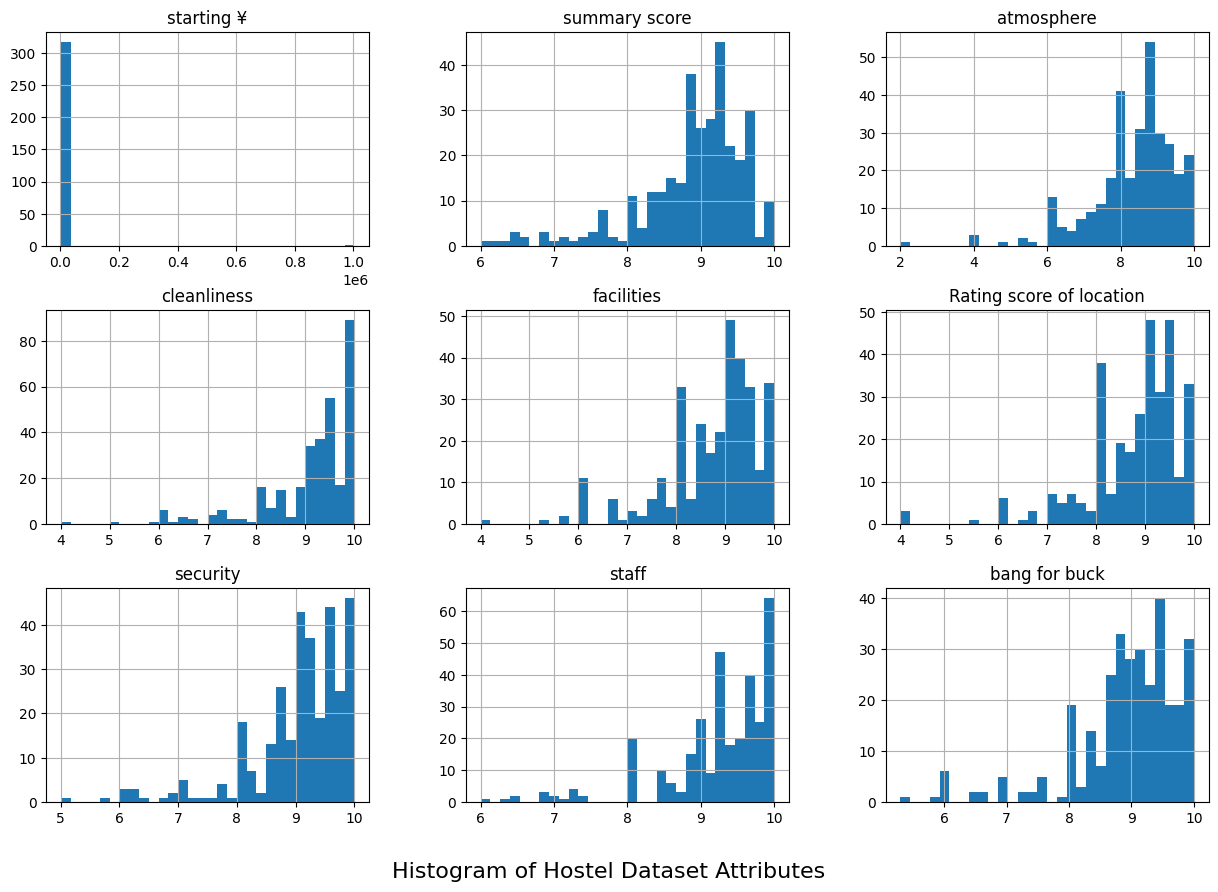

In [12]:
df2 = drop_na_df.copy(deep=True)

# Renaming names of columns
df2.rename({'price.from': 'starting ¥',
           'summary.score': 'summary score',
           'location.y': 'Rating score of location',
            'valueformoney': "bang for buck",
            'lon':'longitude',
            'lat':'latitude'
           }, axis=1, inplace=True)

df2.hist(bins=30, figsize=(15, 10))

# Add a title below the charts
plt.suptitle('Histogram of Hostel Dataset Attributes', y=0.05, fontsize=16)

plt.show()

## Digging into Hostel ¥

In [13]:
df2.describe()

,starting ¥,summary score,atmosphere,cleanliness,facilities,Rating score of location,security,staff,bang for buck
count,3.190000e+02,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,8.768652e+03,8.881191,8.355486,9.108464,8.721317,8.756113,9.044514,9.236991,8.940439
std,7.911620e+04,0.731560,1.155909,0.988403,1.002034,0.988782,0.860941,0.757693,0.860979
min,1.000000e+03,6.000000,2.000000,4.000000,4.000000,4.000000,5.000000,6.000000,5.300000
25%,2.000000e+03,8.600000,7.900000,8.900000,8.100000,8.200000,8.800000,9.000000,8.700000
50%,2.500000e+03,9.000000,8.600000,9.400000,9.000000,9.000000,9.200000,9.400000,9.100000
75%,2.900000e+03,9.400000,9.000000,9.800000,9.350000,9.400000,9.600000,9.800000,9.500000
max,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


(array([317.,   0.,   0.,   0.,   2.]),
 array([1.0000e+03, 2.0144e+05, 4.0188e+05, 6.0232e+05, 8.0276e+05,
        1.0032e+06]),
 <BarContainer object of 5 artists>)

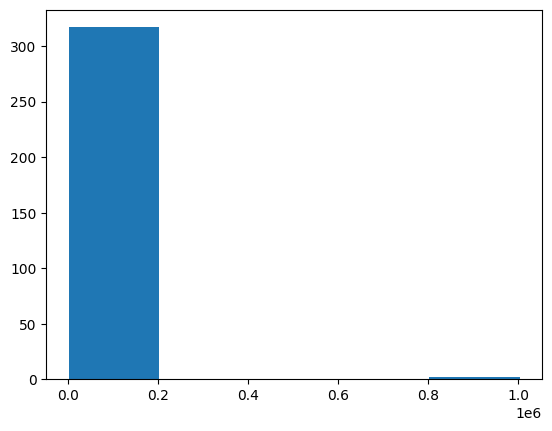

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2['starting ¥'].describe()

plt.hist(df2['starting ¥'], range=(1000, 1003200), bins=5)

Analyzing outlier in Yen - We have only two rows as outliers. We will remove these entries to gain more valuable insights.

,hostel.name,City,starting ¥,Distance,summary score,rating.band,atmosphere,cleanliness,facilities,Rating score of location,security,staff,bang for buck
289,Shell Nell namba,Osaka,1003200,4.8km from city centre,8.300,Fabulous,6.000,8.000,9.000,9.000,9.000,9.000,8.000
316,Tokyo Central Youth Hostel,Tokyo,1003200,4.8km from city centre,8.000,Fabulous,6.000,10.000,10.000,8.000,8.000,8.000,6.000


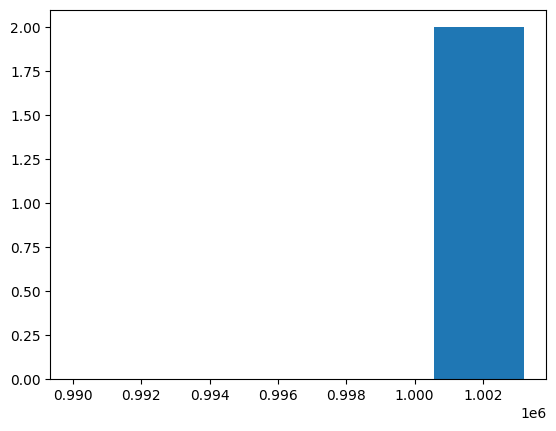

In [15]:
df2_Outliers = df2.loc[df2['starting ¥'] > 1000000]
plt.hist(df2_Outliers['starting ¥'], range=(990000, 1003200), bins=5)

df2_Outliers.head()

Min, Max starting ¥: 1000, 7600 
Mean starting ¥: 2494.6372239747634
1st Quartile starting ¥: 2000.0
3rd Quartile starting ¥: 2900.0


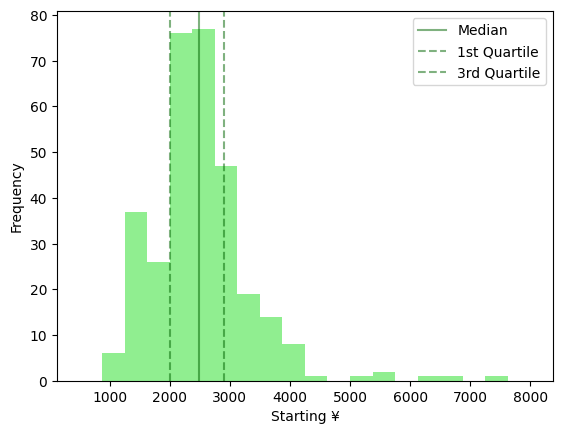

In [16]:
df2_sinOutliers = df2.drop([289, 316], inplace = False, axis = 0)
df2_sinOutliers.describe()

df2_sinOutliers_min = df2_sinOutliers['starting ¥'].min()
df2_sinOutliers_max = df2_sinOutliers['starting ¥'].max()
print(f"Min, Max starting ¥: {df2_sinOutliers_min}, {df2_sinOutliers_max} ")
df2_sinOutliers_mean = df2_sinOutliers['starting ¥'].mean()
print(f"Mean starting ¥: {df2_sinOutliers_mean}")
df2_sinOutliers_1stQ = df2_sinOutliers['starting ¥'].quantile(0.25)
print(f"1st Quartile starting ¥: {df2_sinOutliers_1stQ}")
df2_sinOutliers_3rdQ = df2_sinOutliers['starting ¥'].quantile(0.75)
print(f"3rd Quartile starting ¥: {df2_sinOutliers_3rdQ}")

plt.hist(df2_sinOutliers['starting ¥'], range=(500, 8000), bins=20, color='lightgreen')
plt.axvline(df2_sinOutliers_mean, color='darkgreen', linestyle='-', label='Median', alpha=0.5)
plt.axvline(df2_sinOutliers_1stQ, color='darkgreen', linestyle='--', label='1st Quartile', alpha=0.5)
plt.axvline(df2_sinOutliers_3rdQ, color='darkgreen', linestyle='--', label='3rd Quartile', alpha=0.5)
plt.xlabel('Starting ¥')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Starting price (yen) per city

In [17]:
total_row = df2_sinOutliers.shape[0]
print(f"Total number of rows: {total_row} \n")

# Showing the make up of data entries per city
city_entries = df2_sinOutliers.groupby('City')['starting ¥'].count()
print(city_entries, '\n')

num_entries = (df2_sinOutliers.groupby('City')['starting ¥'].count()).sum()
print(f"Total number of rows with price data: {num_entries} \n")

Total number of rows: 317 

City
Fukuoka-City     17
Hiroshima        14
Kyoto            71
Osaka            97
Tokyo           118
Name: starting ¥, dtype: int64 

Total number of rows with price data: 317 



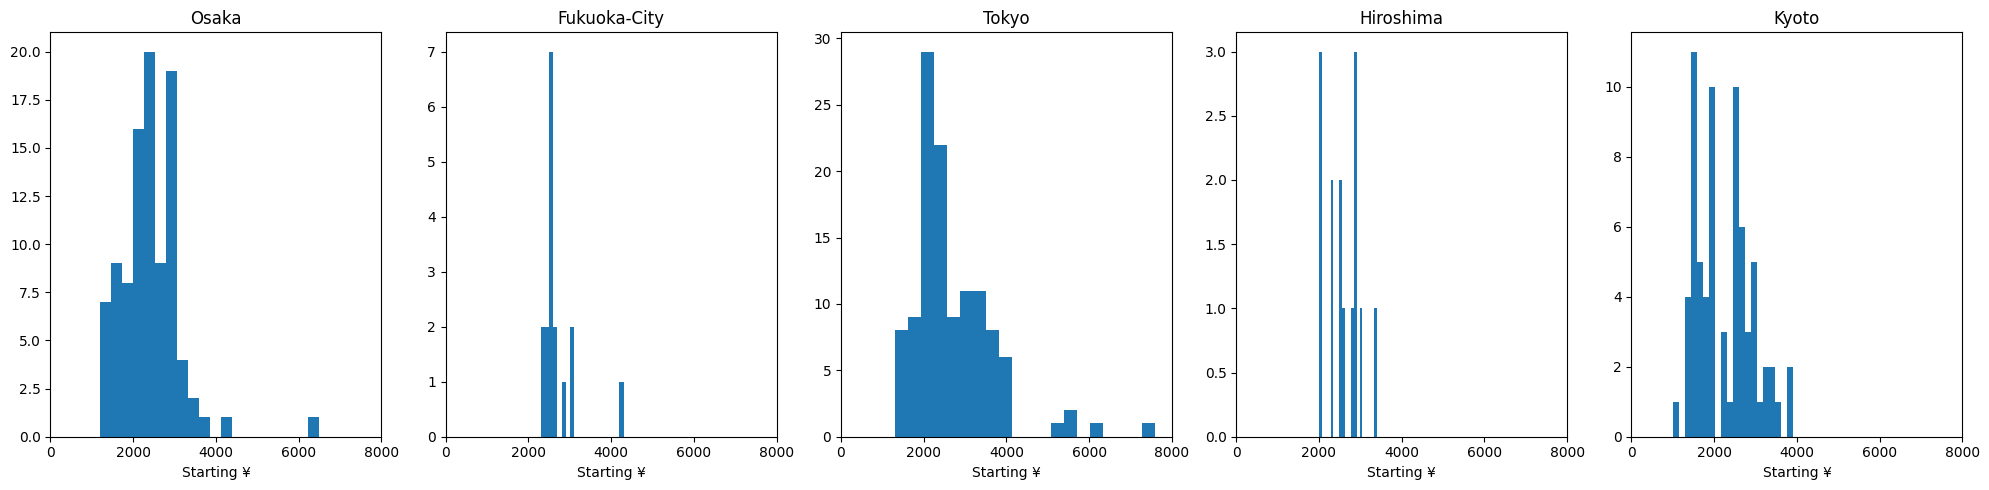

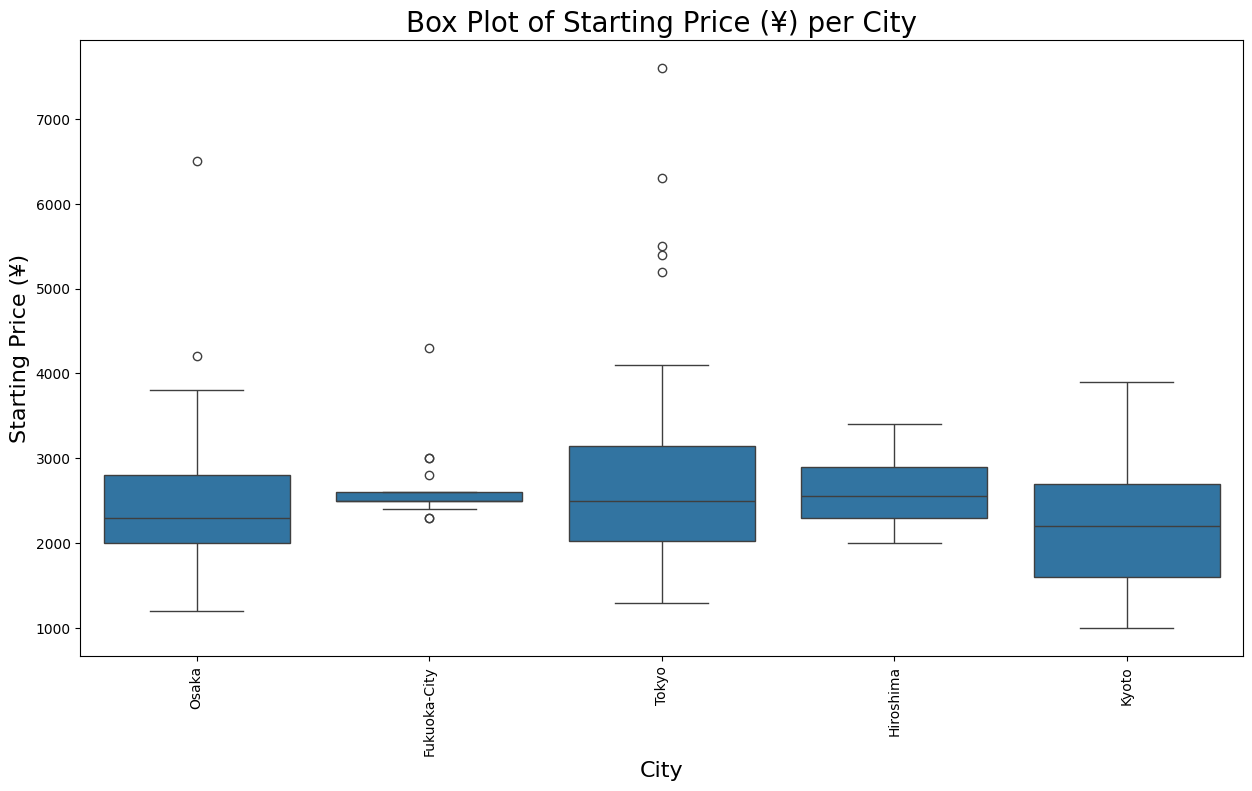

In [18]:
# Create a figure and axes
fig, axs = plt.subplots(1, len(df2_sinOutliers['City'].unique()), figsize=(20, 5))

# Iterate through unique cities and plot histograms
for i, city in enumerate(df2_sinOutliers['City'].unique()):
    city_df = df2_sinOutliers[df2_sinOutliers['City'] == city]
    axs[i].hist(city_df['starting ¥'], bins=20)
    axs[i].set_title(city)
    axs[i].set_xlabel('Starting ¥')
    axs[i].set_xlim(0, 8000)

plt.tight_layout()
plt.show()

print('\n')


plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='starting ¥', data=df2_sinOutliers)
plt.xticks(rotation=90)
plt.title('Box Plot of Starting Price (¥) per City', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Starting Price (¥)', fontsize=16)
plt.show()

In [19]:
df2_sinOutliers['Distance'] = df2_sinOutliers['Distance'].str.replace('km from city centre', '').astype(float)
df2_sinOutliers.head()

,hostel.name,City,starting ¥,Distance,summary score,rating.band,atmosphere,cleanliness,facilities,Rating score of location,security,staff,bang for buck
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.900,9.200,Superb,8.900,9.400,9.300,8.900,9.000,9.400,9.400
1,& And Hostel,Fukuoka-City,2600,0.700,9.500,Superb,9.400,9.700,9.500,9.700,9.200,9.700,9.500
2,&And Hostel Akihabara,Tokyo,3600,7.800,8.700,Fabulous,8.000,7.000,9.000,8.000,10.000,10.000,9.000
3,&And Hostel Ueno,Tokyo,2600,8.700,7.400,Very Good,8.000,7.500,7.500,7.500,7.000,8.000,6.500
4,&And Hostel-Asakusa North-,Tokyo,1500,10.500,9.400,Superb,9.500,9.500,9.000,9.000,9.500,10.000,9.500


In [20]:
print(df2_sinOutliers['City'].unique())
print(df2_sinOutliers['rating.band'].unique())

['Osaka' 'Fukuoka-City' 'Tokyo' 'Hiroshima' 'Kyoto']
['Superb' 'Fabulous' 'Very Good' 'Good']


In [21]:
def convert_rating_to_number(rating):
  if rating == 'Good':
    return 1
  elif rating == 'Very Good':
    return 2
  elif rating == 'Fabulous':
    return 3
  elif rating == 'Superb':
    return 4
  else:
    return 0  # Handle cases where rating is not one of the expected values

df2_sinOutliers['rating.band'] = df2_sinOutliers['rating.band'].apply(convert_rating_to_number)

# checking that no unexpected values were found
print(df2_sinOutliers['rating.band'].unique())

[4 3 2 1]


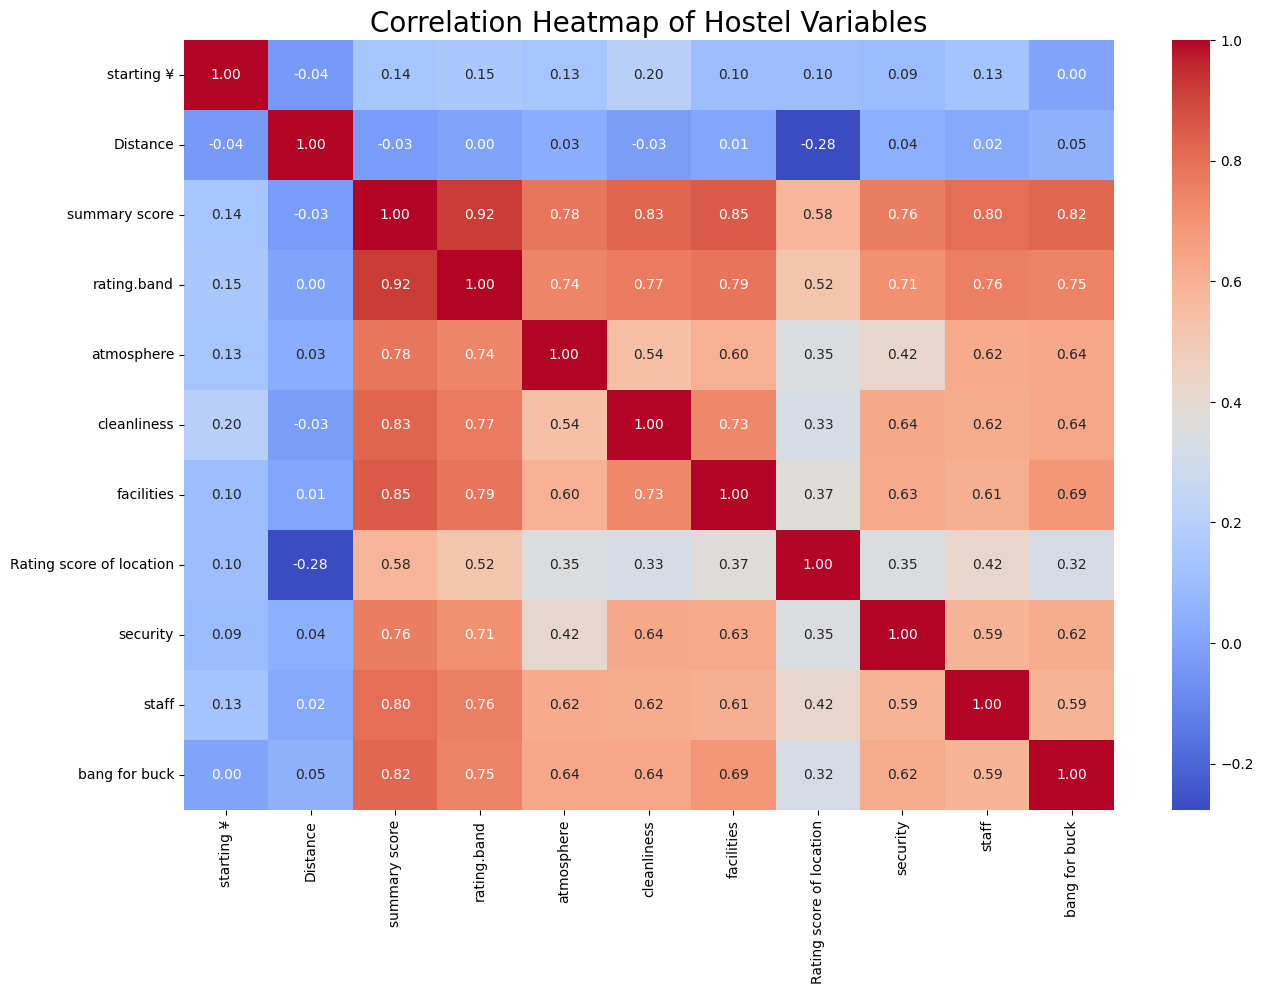

In [22]:
# prompt: create a correlation heatmap between all variables except the first two columns

import matplotlib.pyplot as plt
correlation_matrix = df2_sinOutliers.iloc[:, 2:].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Hostel Variables', fontsize=20)
plt.show()
